In [62]:
## importing library 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data = pd.read_csv("D:/Lecture file/25 th lecture 29 march/KNN Assignment/iphone_purchase_records.csv")
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
## data check  for null value
data.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [4]:
data.shape

(400, 4)

In [5]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
d = {'Male':0 ,'Female':1}
d

{'Male': 0, 'Female': 1}

In [7]:
data['Gender'] = data['Gender'].map(d)

In [8]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [9]:
X = data.iloc[:,0:3]
X

,Gender,Age,Salary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [10]:
y = data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

## Training and testing of iphone purchase data 

In [145]:
scaler = StandardScaler()

In [147]:
X_scaled= scaler.fit_transform(X)

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)
X_train.shape,y_train.shape

((320, 3), (320,))

In [151]:
X_test.shape,y_test.shape

((80, 3), (80,))

## Importing knn library 

In [154]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import joblib

In [156]:
Knn_iphone_model = KNeighborsRegressor(n_neighbors =3)
Knn_iphone_model_train = Knn_iphone_model.fit(X_train,y_train)
print("Training of iphone purchase data for knn model is completed ")

Training of iphone purchase data for knn model is completed 


In [158]:
y_pred =Knn_iphone_model_train.predict(X_test)

In [160]:
score =Knn_iphone_model_train.score(X_train,y_train)*100
print (f'score of the  knn model is : {round(score,2)} ')

score of the  knn model is : 78.06 


In [162]:
mse =mean_squared_error(y_test,y_pred)
print(f' mse of the model : {mse}')

 mse of the model : 0.08611111111111111


In [164]:
length=sqrt(len(data))
print(f'Length of the iphone purchase data is :{length}')

Length of the iphone purchase data is :20.0


In [166]:
pd.DataFrame({'Actual':y_test ,'prediction':y_pred})

,Actual,prediction
242,1,1.000000
168,1,1.000000
316,1,1.000000
383,1,1.000000
285,1,0.333333
...,...,...
220,0,0.333333
185,0,0.000000
98,0,0.000000
21,1,0.666667


### Trainig the error for  to select k

In [170]:

error = []
for i in range(1,20):
    Knn_iphone_model = KNeighborsRegressor(n_neighbors =i)
    Knn_iphone_model_train = Knn_iphone_model.fit(X_train,y_train)
    err =1-Knn_iphone_model_train.score(X_train,y_train)
    error.append(err)   

In [172]:
Training_iphone_k  =pd.DataFrame({'Neighbours':range(1,20),'error':error})
print(f" Value error of data by knn model : \n {Training_iphone_k.sort_values('error')}")

 Value error of data by knn model : 
     Neighbours     error
0            1  0.000000
1            2  0.155175
2            3  0.219440
3            4  0.242462
4            5  0.281009
5            6  0.285272
6            7  0.300562
7            8  0.308808
8            9  0.309480
11          12  0.317012
12          13  0.319783
10          11  0.319911
13          14  0.321579
9           10  0.321919
14          15  0.324144
15          16  0.327158
16          17  0.329583
17          18  0.333514
18          19  0.334970


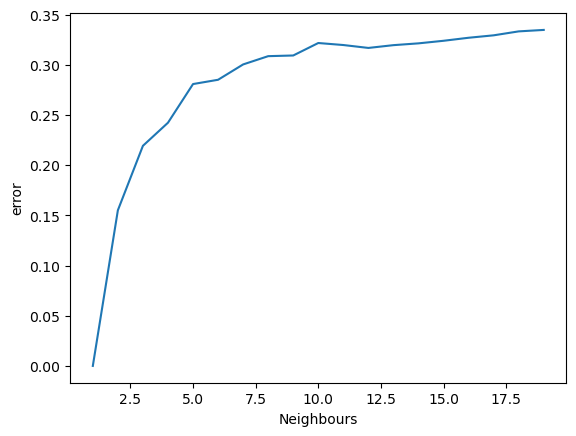

In [174]:
sns.lineplot(data =Training_iphone_k , x ='Neighbours' ,y = 'error')
plt.savefig('D:/Error_lineplots.png')

In [176]:
min_error = Training_iphone_k['error'].min()
print(f'minimum error : {min_error}')

minimum error : 0.0


In [178]:
y_pred = Knn_iphone_model_train.predict(X_test)
y_pred

array([0.63157895, 0.63157895, 0.84210526, 0.63157895, 0.26315789,
       0.78947368, 0.78947368, 0.57894737, 0.        , 0.68421053,
       0.63157895, 0.89473684, 0.        , 0.        , 0.05263158,
       0.78947368, 0.52631579, 0.42105263, 0.57894737, 0.05263158,
       0.        , 0.        , 0.21052632, 0.        , 0.63157895,
       0.        , 0.        , 0.        , 0.84210526, 0.        ,
       0.78947368, 0.52631579, 0.63157895, 0.        , 0.10526316,
       0.84210526, 0.15789474, 0.84210526, 0.        , 0.57894737,
       0.78947368, 0.26315789, 0.57894737, 0.78947368, 0.42105263,
       0.15789474, 0.        , 0.47368421, 0.        , 0.63157895,
       0.05263158, 0.        , 0.10526316, 0.10526316, 0.89473684,
       0.        , 0.10526316, 0.21052632, 0.47368421, 0.84210526,
       0.05263158, 0.        , 0.        , 0.63157895, 0.        ,
       0.        , 0.05263158, 0.        , 0.        , 0.05263158,
       0.        , 0.73684211, 0.84210526, 0.05263158, 0.     

In [180]:
error_val =[]
for i in range(1,20):
    Knn_iphone_model = KNeighborsRegressor(n_neighbors =i)
    Knn_iphone_model_train = Knn_iphone_model.fit(X_train,y_train)
    y_pred = Knn_iphone_model_train.predict(X_test)
    err =1-r2_score(y_test,y_pred)
    error_val.append(err) 


In [182]:
Validation_iphone_k =pd.DataFrame({'Neighbour':range(1,20), 'error': error_val})
Validation_iphone_k.sort_values('error')

,Neighbour,error
8,9,0.278108
9,10,0.287115
7,8,0.291483
10,11,0.293386
11,12,0.294713
6,7,0.295540
12,13,0.302590
4,5,0.307731
5,6,0.308681
13,14,0.313498


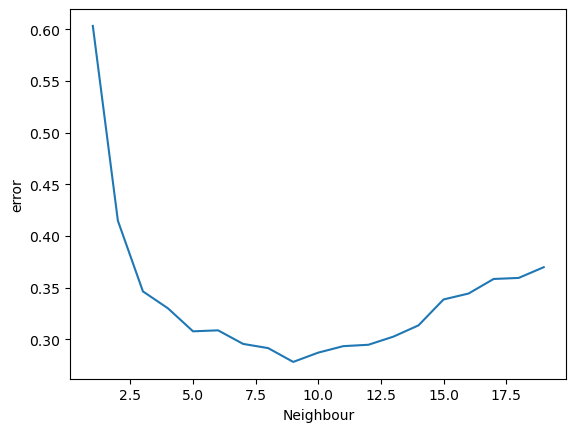

In [184]:
sns.lineplot(data =Validation_iphone_k , x ='Neighbour',y ='error')
plt.savefig('D:/error_lineplot_downward.png')

### saving the model

In [60]:
joblib.dump(Knn_iphone_model ,'iphone_purchase_pred_v1.joblib')

['iphone_purchase_pred_v1.joblib']